In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import cycler

plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':15})

# Set color cycle
ncolor = 5
color_cycle = plt.cm.plasma(np.linspace(0, 1,ncolor))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color_cycle)

# Instructions
The batch size must be changed in `parameters.yml`. Then, to reproduce the plot in the paper,
```
mkdir batch_scaling_results
python run_test.py --gpu -R 10 -numsrc 10000 -o batch_scaling_results/r10_b[BATCHSIZE].pkl
python run_test.py --gpu -R 10 -numsrc 100000 -o batch_scaling_results/r10_b[BATCHSIZE]_s1e5.pkl
python run_test.py --gpu -R 30 -numsrc 10000 -o batch_scaling_results/r30_b[BATCHSIZE].pkl
```
where `BATCHSIZE` = $\{1,2,4,8,16,32,48,56,64,96,128\}$, changing the value accordingly in `parameters.yml` in between runs

In [2]:
batchsizes = np.array([1,2,4,8,16,32,48,56,64,96,128])
nbs = len(batchsizes)
t_10 = np.empty(nbs)
t_10_1e5 = np.empty(nbs)
t_30 = np.empty(nbs)

for i, bs in enumerate(batchsizes):
    fn_10 = f"batch_scaling_results/r10_b{bs:n}.pkl"
    fn_10_1e5 = f"batch_scaling_results/r10_b{bs:n}_s1e5.pkl"
    fn_30 = f"batch_scaling_results/r30_b{bs:n}.pkl"
    with open(fn_10,"rb") as f:
        t_10[i] = pkl.load(f)['timings'][0]
    with open(fn_10_1e5,"rb") as f:
        t_10_1e5[i] = pkl.load(f)['timings'][0]
    with open(fn_30,"rb") as f:
        t_30[i] = pkl.load(f)['timings'][0]

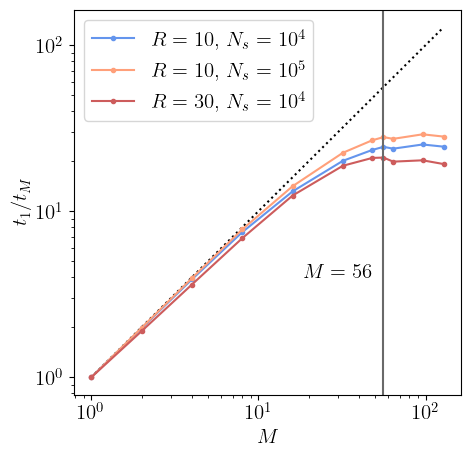

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.loglog(batchsizes,t_10[0] / t_10,'.-',label="$R=10$, $N_s = 10^4$",color='cornflowerblue')[0]
# ax.loglog(batchsizes,t_10[0] / batchsizes,':',color='black')
ax.loglog(batchsizes,batchsizes,':',color='black')
l2 = ax.loglog(batchsizes,t_10_1e5[0] / t_10_1e5,'.-',label="$R=10$, $N_s = 10^5$",color='lightsalmon')[0]

l3 = ax.loglog(batchsizes,t_30[0] / t_30,'.-',label="$R=30$, $N_s = 10^4$",color='indianred')[0]

# ax.loglog(batchsizes,batchsizes,':',color=l2.get_color())

ax.axvline(56,color='dimgray',ls='-')
ax.annotate("$M=56$",xy=(49,4),ha='right')
ax.set_xlabel("$M$")
ax.set_ylabel("$t_1 / t_M$")
ax.legend()

In [6]:
#fig.savefig("../batch_scaling.eps",bbox_inches='tight')
fig.savefig("../scaling_batchsize.png",bbox_inches='tight',dpi=400)